In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stanza


/home/ana.lopes/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#open text file in read mode
text_file = open("/home/ana.lopes/mscmulmiesclin_v0.1/data/mimiciii_onlynotes/54665discharge_summary.txt" , "r")
 
#read whole file to a string
note1 = text_file.read()
 
#close file
text_file.close()
 
print(note1)

Admission Date:  2133-10-9              Discharge Date:   2133-10-11


Service: MEDICINE

Allergies:
Patient recorded as having No Known Allergies to Drugs

Attending:Ashlee
Chief Complaint:
Dyspnea, respiratory distress

Major Surgical or Invasive Procedure:
None

History of Present Illness:
74 y/o with severe AS, CHF with preseved EF, h/o DVT, phemigus
vulgaris presents from Ozarks Healthcare rehab. Pt had wt gain over week
prior to admission up to 153.8lb. On 10-7 lasix 80mg daily was
started with improvement to 149 lb on 10-9 (goal wt 140).
During this time pt had progressive fatigue. Yesterday (per
family) he had a coughing spell after eating yesterday. 10-8 he
developed phlegm production, cough, and left pleuritic chest
pain and was started on Levofloxicin for new lung (LUL)
infiltrates. This am he developed a low grade temp. Flagyl was
added for aspiration PNA. Nebs and roxanal was also added.
Diuresis was continues. This afternoon dested to 90% on 3L and T
99. Transfered to Geo

In [4]:
import stanza

nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma')
doc = nlp(note1)
print(*[f'word: {word.text+" "}\tlemma: {word.lemma}' for sent in doc.sentences for word in sent.words], sep='\n')

2023-03-29 10:47:28 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2023-03-29 10:47:28 WARNING: Can not find mwt: default from official model list. Ignoring it.
2023-03-29 10:47:32 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |

2023-03-29 10:47:32 INFO: Using device: cuda
2023-03-29 10:47:32 INFO: Loading: tokenize
2023-03-29 10:47:50 INFO: Loading: pos
2023-03-29 10:47:50 INFO: Loading: lemma
2023-03-29 10:47:50 INFO: Done loading processors!


word: Admission 	lemma: admission
word: Date 	lemma: date
word: : 	lemma: :
word: 2133 	lemma: 2133
word: - 	lemma: -
word: 10-9 	lemma: 10-9
word: Discharge 	lemma: discharge
word: Date 	lemma: date
word: : 	lemma: :
word: 2133-10-11 	lemma: 2133-10-11
word: Service 	lemma: service
word: : 	lemma: :
word: MEDICINE 	lemma: medicine
word: Allergies 	lemma: allergy
word: : 	lemma: :
word: Patient 	lemma: patient
word: recorded 	lemma: record
word: as 	lemma: as
word: having 	lemma: have
word: No 	lemma: no
word: Known 	lemma: know
word: Allergies 	lemma: Allergy
word: to 	lemma: to
word: Drugs 	lemma: Drug
word: Attending 	lemma: attend
word: : 	lemma: :
word: Ashlee 	lemma: Ashlee
word: Chief 	lemma: Chief
word: Complaint 	lemma: complaint
word: : 	lemma: :
word: Dyspnea 	lemma: dyspnea
word: , 	lemma: ,
word: respiratory 	lemma: respiratory
word: distress 	lemma: distress
word: Major 	lemma: major
word: Surgical 	lemma: surgical
word: or 	lemma: or
word: Invasive 	lemma: Invasive
word:

In [5]:
lemmatization= []
for sent in doc.sentences:
    for word in sent.words:
        lemmatization.append(word.lemma)

In [6]:
lemmatization

['admission',
 'date',
 ':',
 '2133',
 '-',
 '10-9',
 'discharge',
 'date',
 ':',
 '2133-10-11',
 'service',
 ':',
 'medicine',
 'allergy',
 ':',
 'patient',
 'record',
 'as',
 'have',
 'no',
 'know',
 'Allergy',
 'to',
 'Drug',
 'attend',
 ':',
 'Ashlee',
 'Chief',
 'complaint',
 ':',
 'dyspnea',
 ',',
 'respiratory',
 'distress',
 'major',
 'surgical',
 'or',
 'Invasive',
 'procedure',
 ':',
 'none',
 'history',
 'of',
 'present',
 'illness',
 ':',
 '74',
 'y/o',
 'with',
 'severe',
 'as',
 ',',
 'CHF',
 'with',
 'preseved',
 'EF',
 ',',
 'h/o',
 'DVT',
 ',',
 'phemigus',
 'vulgaris',
 'present',
 'from',
 'Ozark',
 'Healthcare',
 'rehab',
 '.',
 'Pt',
 'have',
 'to',
 'gain',
 'over',
 'week',
 'prior',
 'to',
 'admission',
 'up',
 'to',
 '153.8',
 'lb',
 '.',
 'on',
 '10',
 '-',
 '7',
 'lasix',
 '80',
 'mg',
 'daily',
 'be',
 'start',
 'with',
 'improvement',
 'to',
 '149',
 'lb',
 'on',
 '10',
 '-',
 '9',
 '(',
 'goal',
 'wt',
 '140',
 ')',
 '.',
 'during',
 'this',
 'time',
 'pt'

In [7]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
  

filtered_lemma= [w for w in lemmatization if not w in stop_words]



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ana.lopes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#remove numbers

for word in filtered_lemma:
    try:
        int(word)
        filtered_lemma.remove(word)
    except ValueError:
        continue

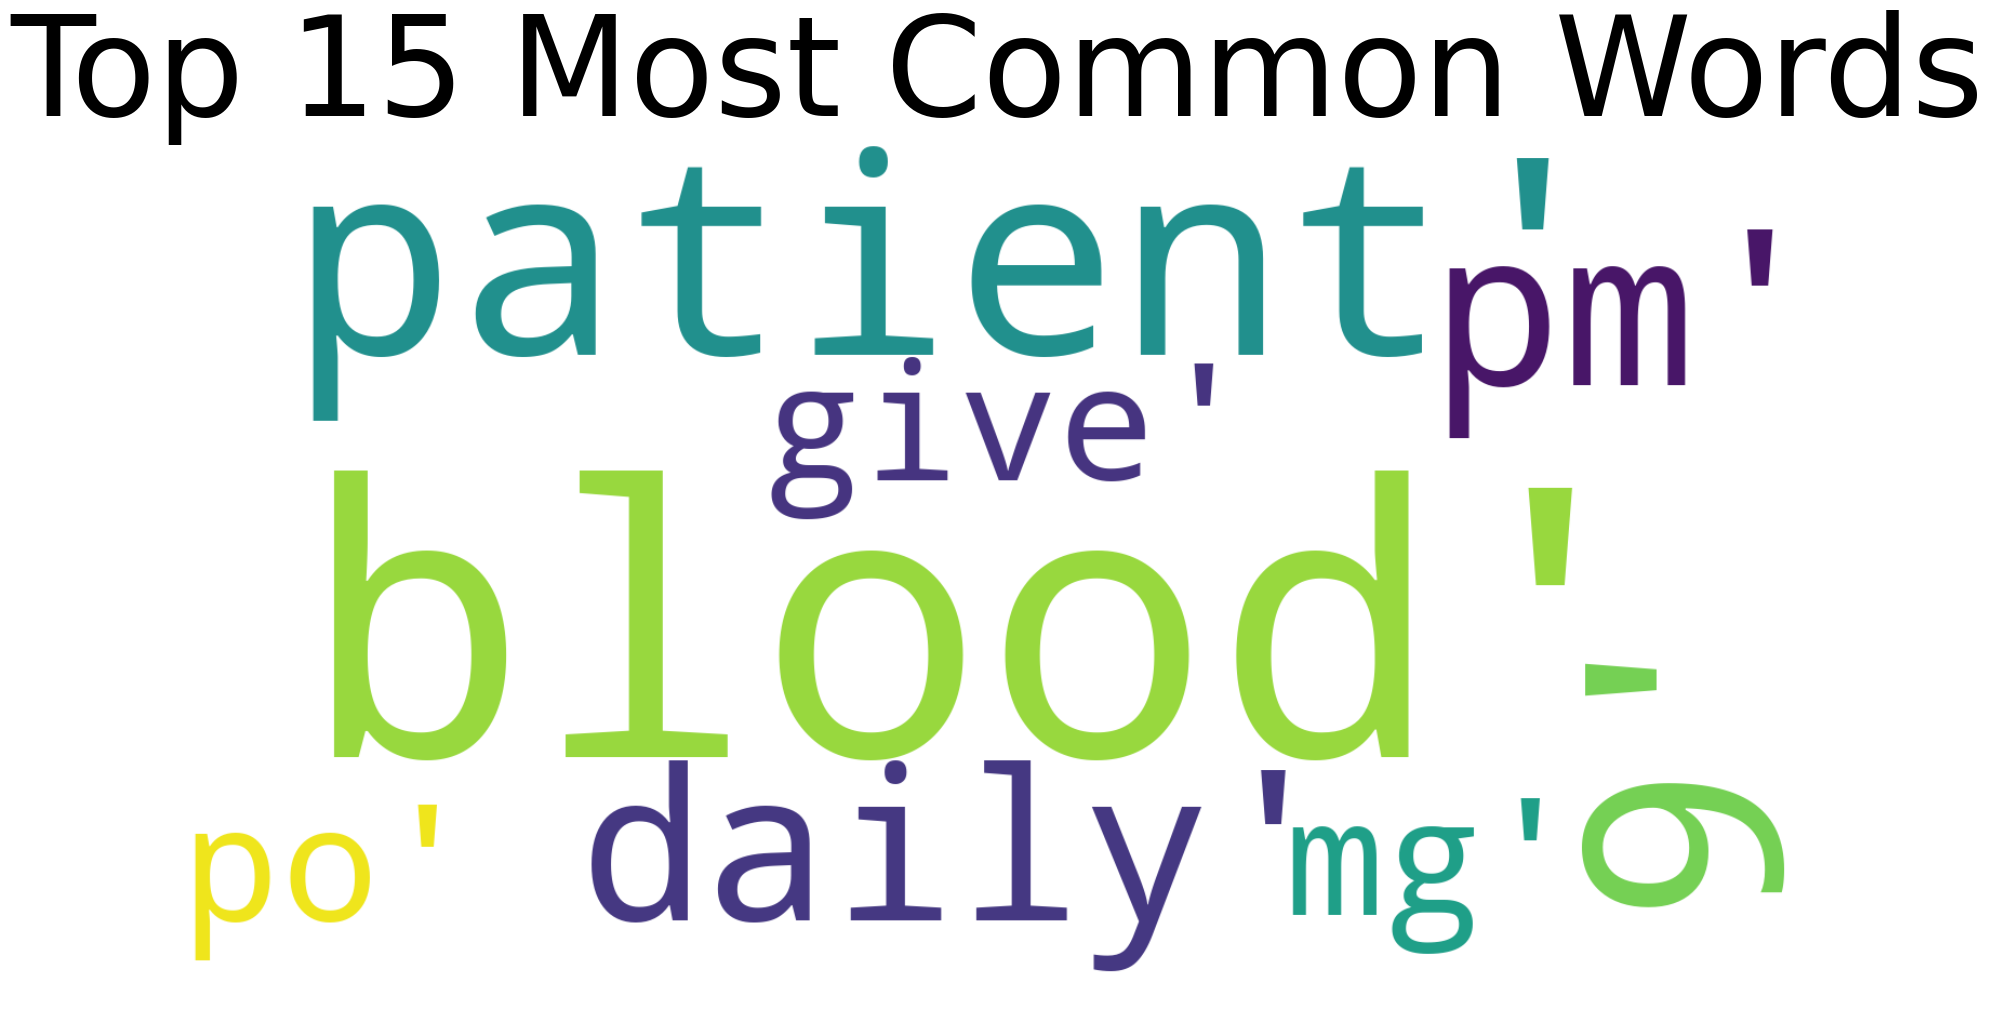

In [10]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.probability import FreqDist

mostcommon = FreqDist(filtered_lemma).most_common(15)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 15 Most Common ][Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

In [7]:
x =  []
x.append(("AAAA","NOUN"))
x.append(("MED","VERB"))
a =  []
for i in x:
    a.append(i[0])
a

['AAAA', 'MED']